In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV , train_test_split
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
from sklearn.preprocessing import LabelEncoder , MinMaxScaler

In [8]:
import pandas as pd

# Read the CSV file with ISO-8859-1 encoding
df = pd.read_csv("/content/IMDb Movies India.csv", encoding="ISO-8859-1")


In [10]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [11]:
df.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [12]:
df.dropna(inplace=True)


In [14]:
df = df[~df.iloc[: , 1:9].isna().apply(lambda x: all(x), axis=1)]
df.shape

(5659, 10)

In [16]:
df.drop_duplicates(subset=['Name', 'Year'], inplace=True)
df.shape

(5657, 10)

In [17]:
df['Year'] = df['Year'].str.replace(r'(', '').str.replace(r')', '')
df.head()

<ipython-input-17-faa20d96edc5>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Year'] = df['Year'].str.replace(r'(', '').str.replace(r')', '')


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [18]:
df['Duration'] = df['Duration'].str.replace(r' min', '')
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [19]:
df.drop(df.loc[df['Year']=='2022'].index, inplace = True)
df.shape

(5657, 10)

Summary statistics:
            Rating
count  5657.000000
mean      5.897967
std       1.381035
min       1.100000
25%       5.000000
50%       6.100000
75%       6.900000
max      10.000000


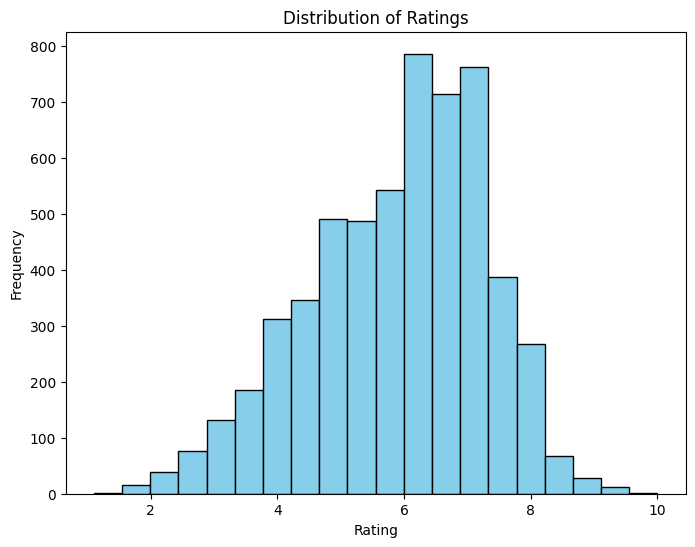

In [23]:

print("Summary statistics:")
print(df.describe())

# Histogram of ratings
plt.figure(figsize=(8, 6))
plt.hist(df['Rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

<ipython-input-24-250c2cb09452>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('viridis', num_colors)


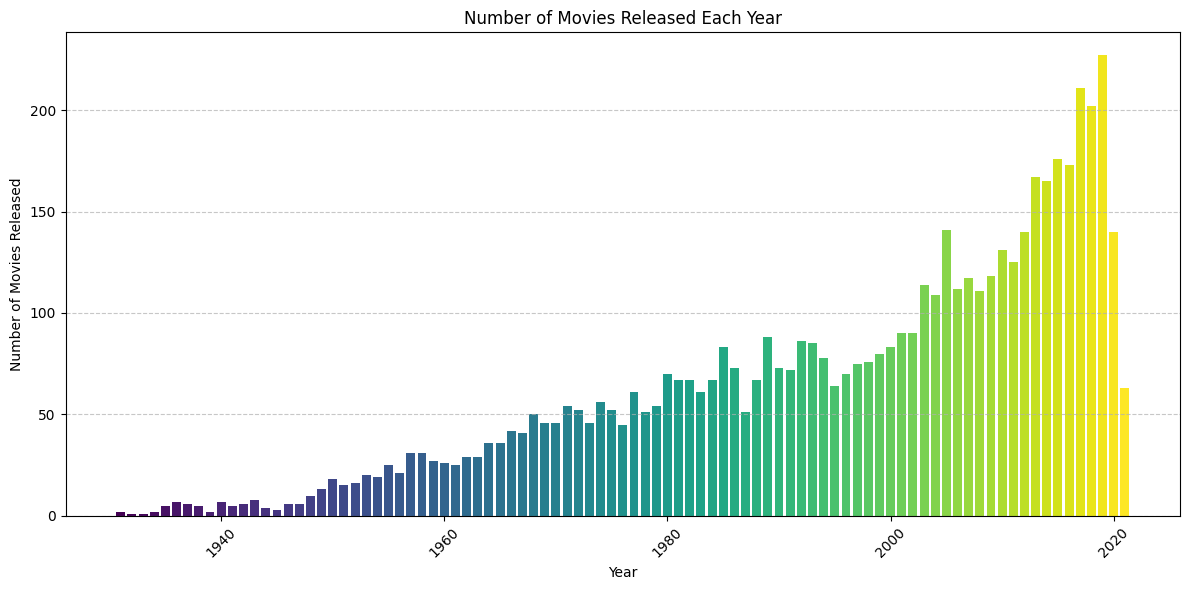

In [24]:
df['Year'] = df['Year'].astype(float)

# Count the number of movies released each year
movies_per_year = df['Year'].value_counts().sort_index()

num_colors = len(movies_per_year)
color_map = plt.cm.get_cmap('viridis', num_colors)

# Plot the number of movies released each year
plt.figure(figsize=(12, 6))
plt.bar(movies_per_year.index, movies_per_year.values, color=color_map(np.linspace(0, 1, num_colors)))
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

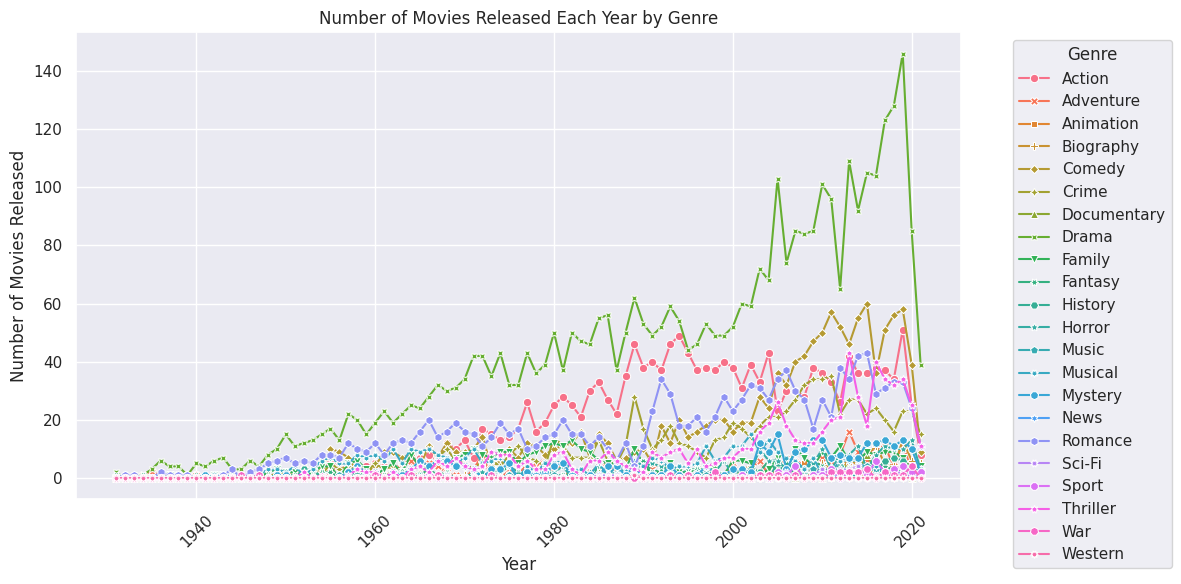

In [26]:
sns.set_theme()

genres = df['Genre'].str.get_dummies(sep=', ')

# Add the 'Year' column to the new DataFrame
genres['Year'] = df['Year']

# Group by year and sum the counts of each genre
genres_yearwise = genres.groupby('Year').sum()

# Plot the graph using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=genres_yearwise, markers=True, dashes=False)
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year by Genre')
plt.xticks(rotation=45)
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [27]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']], ignore_index=True)

actor_ratings = pd.DataFrame({'Actor': actors, 'Rating': df['Rating']})

# Group the data by actor and calculate the average rating of the movies in which each actor has acted
actor_average_rating = actor_ratings.groupby('Actor')['Rating'].mean()
df['Avg_Rating_by_Actor'] = df['Actor 1'].map(actor_average_rating)

In [29]:
missing_values = df.isna().sum()

print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
Name                     0
Year                     0
Duration                 0
Genre                    0
Rating                   0
Votes                    0
Director                 0
Actor 1                  0
Actor 2                  0
Actor 3                  0
Avg_Rating_by_Actor    848
dtype: int64


In [30]:
mean_rating_by_actor = df['Avg_Rating_by_Actor'].mean()
df['Avg_Rating_by_Actor'] = df['Avg_Rating_by_Actor'].fillna(mean_rating_by_actor)

# Verify that missing values have been filled
missing_values_after_imputation = df.isna().sum()

# Display the count of missing values for each column after imputation
print("Number of missing values in each column after imputation:")
print(missing_values_after_imputation)

Number of missing values in each column after imputation:
Name                   0
Year                   0
Duration               0
Genre                  0
Rating                 0
Votes                  0
Director               0
Actor 1                0
Actor 2                0
Actor 3                0
Avg_Rating_by_Actor    0
dtype: int64


In [43]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)
X = df[['Year', 'Duration', 'Votes', 'Avg_Rating_by_Actor']]
y = df['Rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3959, 4)
Shape of X_test: (1698, 4)
Shape of y_train: (3959,)
Shape of y_test: (1698,)


In [45]:

from sklearn.tree import DecisionTreeRegressor

models = {'Decision Tree': DecisionTreeRegressor()}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    from sklearn.metrics import mean_squared_error
    # Calculate mean squared error
    mse = mean_squared_error(y_test, y_pred)

    # Print model performance
    print(f"{name}:")
    print(f"Mean Squared Error: {mse}")
    print()

Decision Tree:
Mean Squared Error: 2.5613074204946997



In [47]:
 from statsmodels.formula.api import ols
 import statsmodels.api as sm

 df_train = X_train.copy()
df_train['Rating'] = y_train

# Perform Ordinary Least Squares (OLS) regression
ols_model = ols('Rating ~ Year + Duration + Votes + Avg_Rating_by_Actor', data=df_train).fit()

# Generate ANOVA table
anova_table = sm.stats.anova_lm(ols_model, typ=2)
print(anova_table)

                          sum_sq      df           F        PR(>F)
Duration              475.078183   162.0    1.712660  1.032784e-07
Year                  433.141070     1.0  252.959112  3.446773e-55
Votes                 221.045623     1.0  129.093056  1.926211e-29
Avg_Rating_by_Actor     0.639565     1.0    0.373513  5.411322e-01
Residual             6494.741646  3793.0         NaN           NaN


Mean Squared Error: 1.3562748903765347


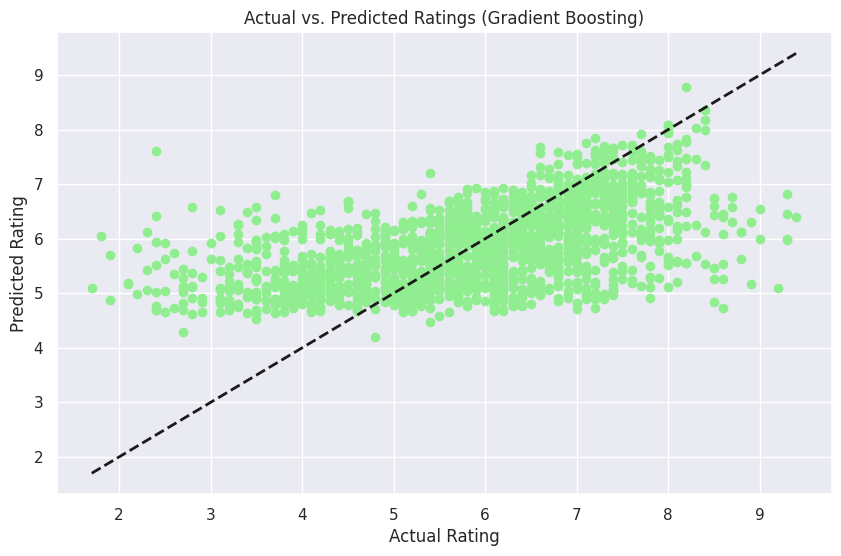

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='lightgreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.title('Actual vs. Predicted Ratings (Gradient Boosting)')
plt.show()

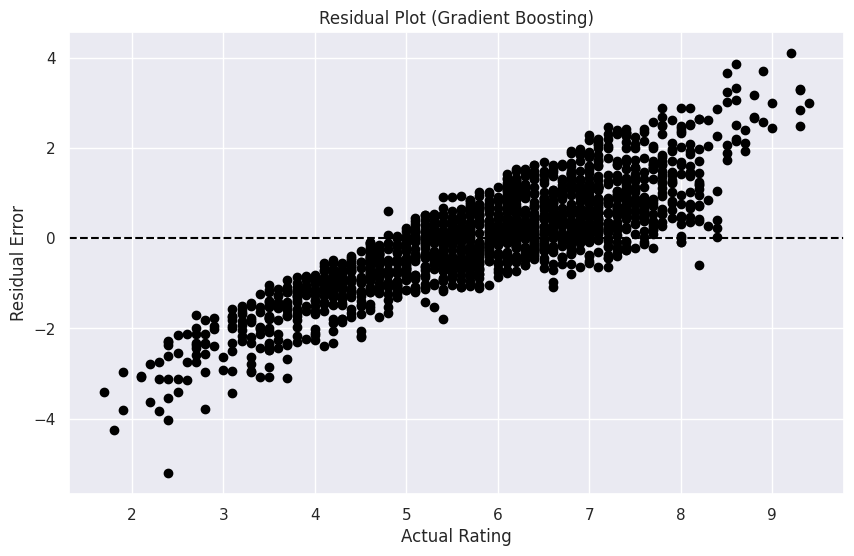

In [52]:
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='black')
plt.xlabel('Actual Rating')
plt.ylabel('Residual Error')
plt.title('Residual Plot (Gradient Boosting)')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

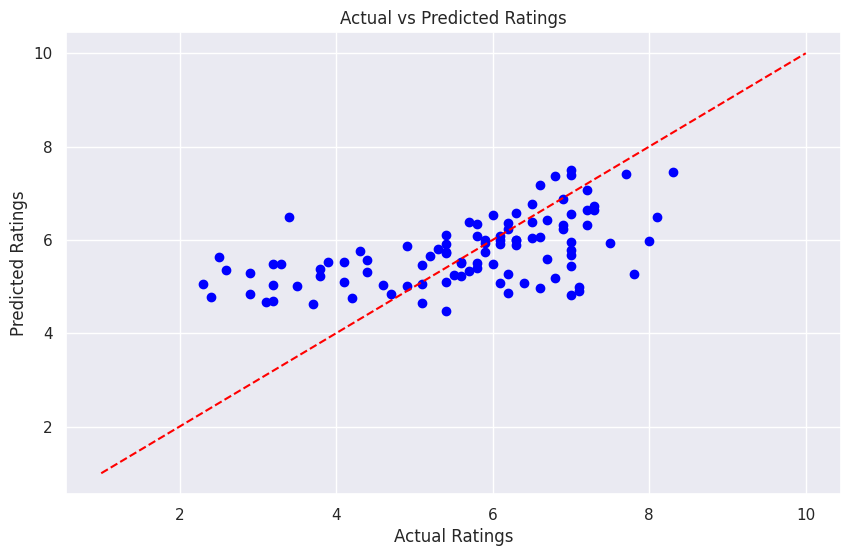

In [54]:
test_data = X_test.sample(n=100, random_state=42)  # Selecting 100 random samples from the test set
actual_ratings = y_test.loc[test_data.index]  # Actual ratings corresponding to the selected samples

# Make predictions on the selected test data
predicted_ratings = gb_model.predict(test_data)

# Plot actual vs predicted ratings
plt.figure(figsize=(10, 6))
plt.scatter(actual_ratings, predicted_ratings, color='blue')
plt.plot([1, 10], [1, 10], color='red', linestyle='--')  # Plotting the line of perfect predictions
plt.title('Actual vs Predicted Ratings')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.show()

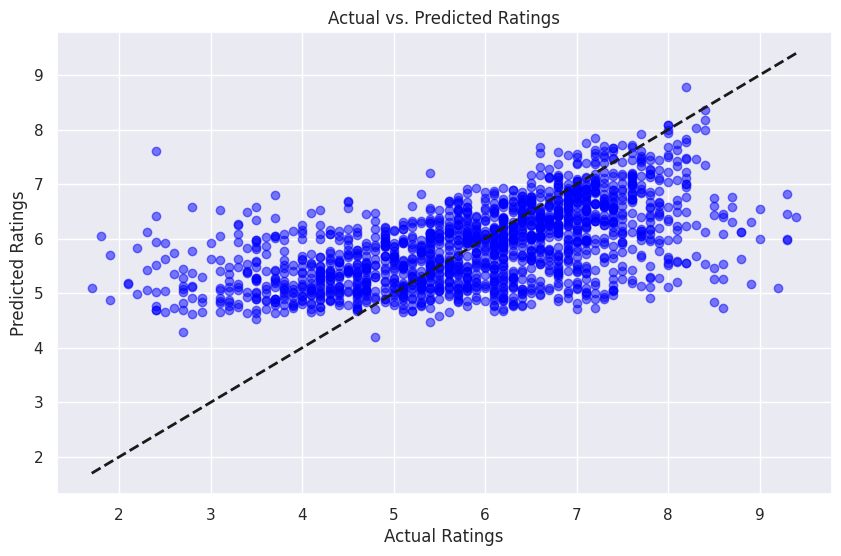

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--k', lw=2)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs. Predicted Ratings')
plt.show()

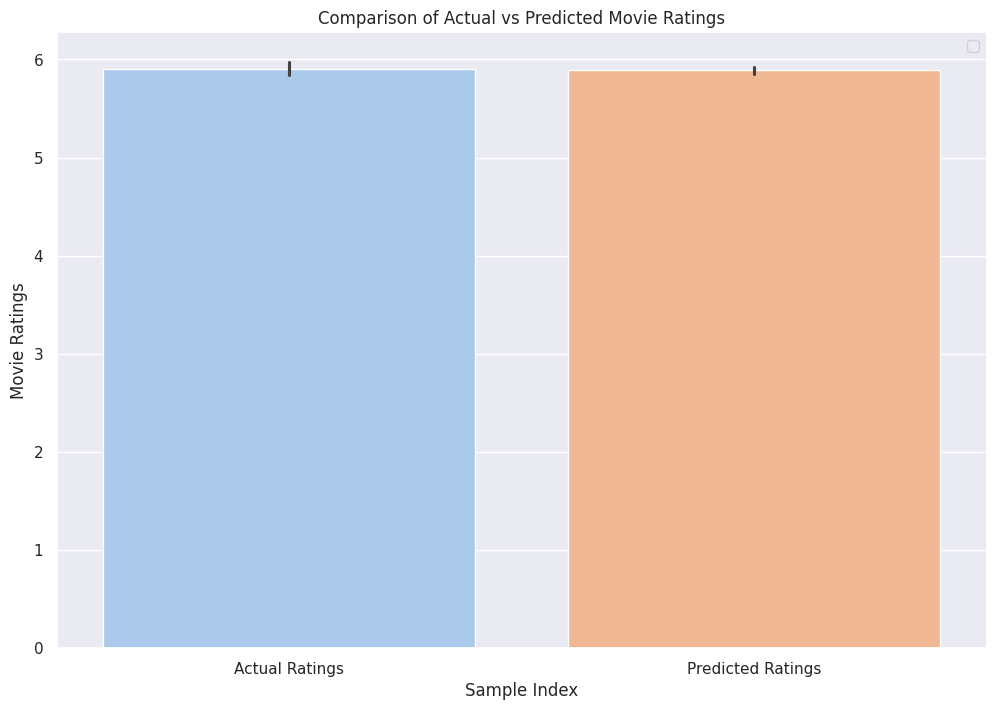

In [56]:
result_df = pd.DataFrame({'Actual Ratings': y_test, 'Predicted Ratings': y_pred})

# Plot the actual and predicted ratings
plt.figure(figsize=(12, 8))
sns.barplot(data=result_df, palette='pastel')

plt.xlabel('Sample Index')
plt.ylabel('Movie Ratings')
plt.title('Comparison of Actual vs Predicted Movie Ratings')
plt.legend(loc='upper right')
plt.show()